In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def show_image(img):
    if len(img.shape) == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap='gray')
    plt.axis('off');

In [31]:
cat_image_small = cv2.resize(cv2.imread('cat.png'), (0,0),  fx=0.25, fy=0.25)
cv2.imwrite('cat_res.png', cat_image_small)

True

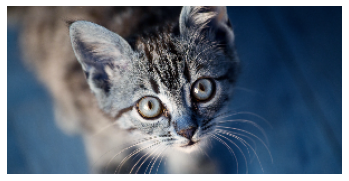

In [32]:
cat_img = cv2.imread('cat_res.png')
show_image(cat_img)

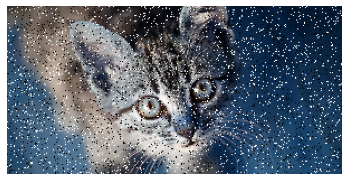

In [33]:
# Add salt and pepper
sp_cat_img = cat_img.copy()
noise = np.random.rand(*cat_img.shape[:2])
sp_cat_img[noise < 0.05] = 0
sp_cat_img[noise > 0.95] = 255
show_image(sp_cat_img)
np.save('cat_sp_noise.npy', sp_cat_img);

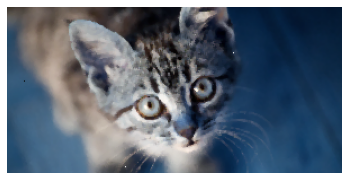

In [58]:
median = cv2.medianBlur(sp_cat_img, 3)[1:-1, 1:-1]
show_image(median)
np.save("cat_sp_noise_median", median)
# assert np.allclose(cv2.medianBlur(np.save('cat_sp_noise'), 3), cv2.imread('cat_sp_noise_median.png')), "FAIL"

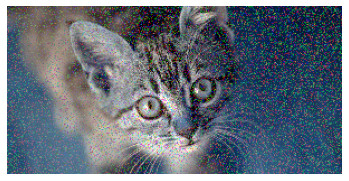

In [69]:
g_noise = np.clip(np.random.randn(*cat_img.shape)*20 + 128, 0, 255)
select = np.random.rand(*cat_img.shape)
g_cat_img = cat_img.copy()
g_cat_img[select < 0.2] = g_noise[select < 0.2]
show_image(g_cat_img)
np.save('cat_g_noise', g_cat_img);

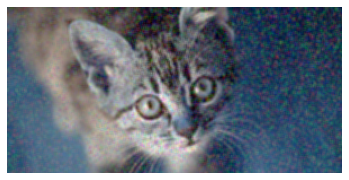

In [70]:
avg = cv2.blur(g_cat_img, (3,3))[1:-1, 1:-1]
show_image(avg)
np.save("cat_g_noise_blur", avg)
# assert np.allclose(cv2.blur(np.load('cat_g_noise.npy'), (3,3)), np.load('cat_g_noise_blur.npy')), "FAIL"

In [72]:
avg[0,0]

array([50, 54, 64], dtype=uint8)

In [74]:
np.round(np.mean(g_cat_img[:3,:3], (1,2)))

array([39., 72., 57.])

In [11]:
input_1 = np.random.randint(100, size=(10, 10))
kernel_1 = np.random.randint(-3, 3, size=(3, 3))
outp = convolve2d(input_1, kernel_1)
np.save('input', input_1)
np.save('kernel', kernel_1)
np.save('convolution_result', outp)

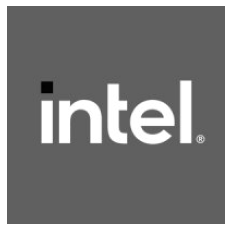

In [12]:
intel_img = cv2.imread('intel_logo.png', 0)
show_image(intel_img)

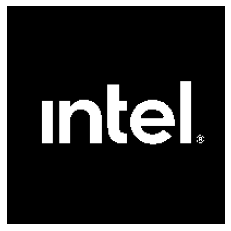

In [13]:
intel_th_200 = np.uint8(intel_img > 200)*255
show_image(intel_th_200)
np.save('intel_th_200', intel_th_200);

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


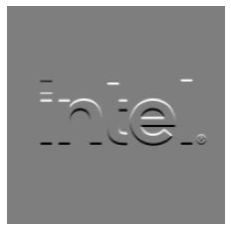

In [15]:
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) 
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,-0,1]]) 
print(sobel_y)
intel_sobel_y = convolve2d(intel_img, sobel_y, 'valid')
show_image(intel_sobel_y)
np.save('intel_sobel_y', intel_sobel_y);

In [16]:
cat_gray = cv2.imread('cat_res.png', 0)

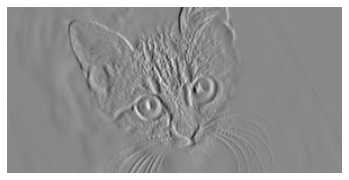

In [17]:
cat_sobel_x = convolve2d(cat_gray, sobel_x, 'valid')
show_image(cat_sobel_x)
np.save('cat_sobel_x', cat_sobel_x);

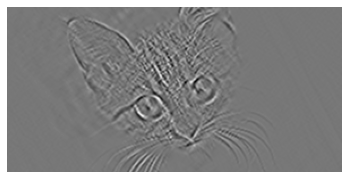

In [18]:
cat_sobel_xy = convolve2d(cat_sobel_x, sobel_y, 'valid')
show_image(cat_sobel_xy)
np.save('cat_sobel_xy', cat_sobel_xy);